# <b> SYRIATEL CHURN ANALYSIS </b>

#### Author : Stella Kitur
--- 
## <b> Project Overview </b>
In this project I have utilised machine learning algorithms in order to identify any trends that can help in predicting whether a customer that is using SyriaTel will stop (churn) using the services. This is to help SyriaTel in their decision making process as well as in developing methods that might help to reduce the churn rate further.

## <b> Business Understanding </b>
### <b> Business Problem </b>
- Who is SyriaTel?
- Customer retention rate is key in the telecommunication domain 
- Important to know what features are leading to churn rate increase 
- What are the potential factors for churn?
SyriaTel is a Telecommunication company 
#### <b>Objectives</b>
As the data scientist assigned to this project, what are your objectives?
1. Identify if there are certain features that can predict whether a customer will churn or not
2. Predict as accurately as possible using a model, whether a customer will churn



#### <b> Metrics of Success </b>
In this model, the metrics of success are outlined as follows :


## <b> Data Understanding </b>
In conducting this analysis, the CRISP-DM data science process was used.
There were : Outline important notes based on the dataset... etc. etc.

---
# <b> Import Libraries </b>

To start off this analysis, we will import the libraries that will be used in this notebook.

As well as including the necessary formatting for the data visualisations used throughout the notebook.

For convenience, the libraries have been categorised based on the function. 

In [66]:
# Import Libraries 

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Customization
custom_color = custom_colors = ["#BE5A83", "#F2B6A0", "#FEF2F4"]



# Data preprocessing and transformation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Classification models
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

# Model evaluation and selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import RFECV
from sklearn.metrics import plot_confusion_matrix

# Pipeline and feature selection
from sklearn.pipeline import Pipeline


In [67]:
# Load the data
# Display the shape of the data

df = pd.read_csv('data.csv')
print(df.shape)

(3333, 21)


## <b> Data Understanding </b>
Under this section, we will gain understanding of the dataset while also identifying if there are any missing/duplicated values before proceeding to conduct EDA (Exploratory Data Analysis) on the data to help us identify any key observations in the dataset. 

In [3]:
# Display the first 5 rows of the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Display the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [69]:
# This function will check the datatypes within the dataframe
def check_data_types(dataframe):
    data_types = dataframe.dtypes
    print(data_types)

# Run the function
check_data_types(df)

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


### <b> Data Cleaning </b>

In [70]:
# Functions for duplicate values

# A function that checks for duplicate values in a column
def count_duplicates(df, column_name):
    duplicate_count = df.duplicated(subset=column_name).sum()
    return duplicate_count

# Check for duplicates in the phone number column -- this is because the phone number is a unique identifier so there shouldn't be duplicates
count_duplicates(df, "phone number")

0

There are no duplicate values in the `phone number` column. 


In [71]:
#Checking for null and misssing values
print("There are", df.isnull().values.sum(), "missing values in the dataset")

There are 0 missing values in the dataset


In [6]:
# We will change the datatype of area code from an int to an object

df['area code'] = df['area code'].astype(object)
df['area code'].dtype # Check if the change has been made


dtype('O')

In [7]:
# Explore the values in the state column

print(df.state.value_counts())
print(f"There are {df['state'].nunique()} values, this is because SyriaTel is based in the USA and there are {df['state'].nunique()} states")


WV    106
MN     84
NY     83
AL     80
WI     78
OR     78
OH     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
UT     72
TX     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
WA     66
NV     66
CO     66
MA     65
MS     65
RI     65
AZ     64
MO     63
FL     63
ME     62
NM     62
ND     62
DE     61
NE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64
There are 51 values, this is because SyriaTel is based in the USA and there are 51 states


In [8]:
# Drop the phone number column

df = df.drop('phone number',axis=1)
df.head() #inspect

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
# Define a function that calls the categorical columns in the dataset
def print_categorical_columns(df):
    categorical_cols = df.select_dtypes(include='object').columns.difference(['phone number'])
    for col in categorical_cols:
        print(col.upper())
        print(df[col].unique())
        print('_________________________\n')

# Call the function
print_categorical_columns(df)

AREA CODE
[415 408 510]
_________________________

INTERNATIONAL PLAN
['no' 'yes']
_________________________

STATE
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
_________________________

VOICE MAIL PLAN
['yes' 'no']
_________________________



#### <b> Label Encoding and One-Hot Encoding </b>

In [10]:
# Label Encoding the State column
# Label Encoding is preferred in this case as there are 51 unique values and will replace it with a unique integer.

Label_Encoder = LabelEncoder()
df['state'] = Label_Encoder.fit_transform(df['state'])
df['state']

0       16
1       35
2       31
3       35
4       36
        ..
3328     3
3329    49
3330    39
3331     6
3332    42
Name: state, Length: 3333, dtype: int64

In [11]:
# Convert categorical variables to binary representation
df["international plan"] = df["international plan"].map({"no": 0, "yes": 1})
df["voice mail plan"] = df["voice mail plan"].map({"no": 0, "yes": 1})
df['churn'] = df['churn'].map({False: 0, True: 1})

df.head(6)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,1,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0


##### <b> Feature Engineering </b>

In [12]:
# Feature Engineering -- Total Expenditure 
# This will calculate the total expenditure for each customer


df['total expenditure'] = df['total day charge'] \
                        + df['total eve charge'] \
                        + df['total night charge'] \
                        + df['total intl charge']

df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total expenditure
0,16,128,415,0,1,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56
1,35,107,415,0,1,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24
2,31,137,415,0,0,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29
3,35,84,408,1,0,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80
4,36,75,415,1,0,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09


### <b> Exploratory Data Analysis </b>

##### <b> Summary Statistics </b>

In [13]:
# Descriptive Summary Statistics 

df.describe()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total expenditure
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,101.064806,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914,59.449754
std,14.824911,39.822106,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067,10.502261
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,22.930000
25%,14.000000,74.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,52.380000
50%,26.000000,101.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000,59.470000
75%,39.000000,127.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000,66.480000
max,50.000000,243.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,96.150000


##### <b> Distribution of Features</b>

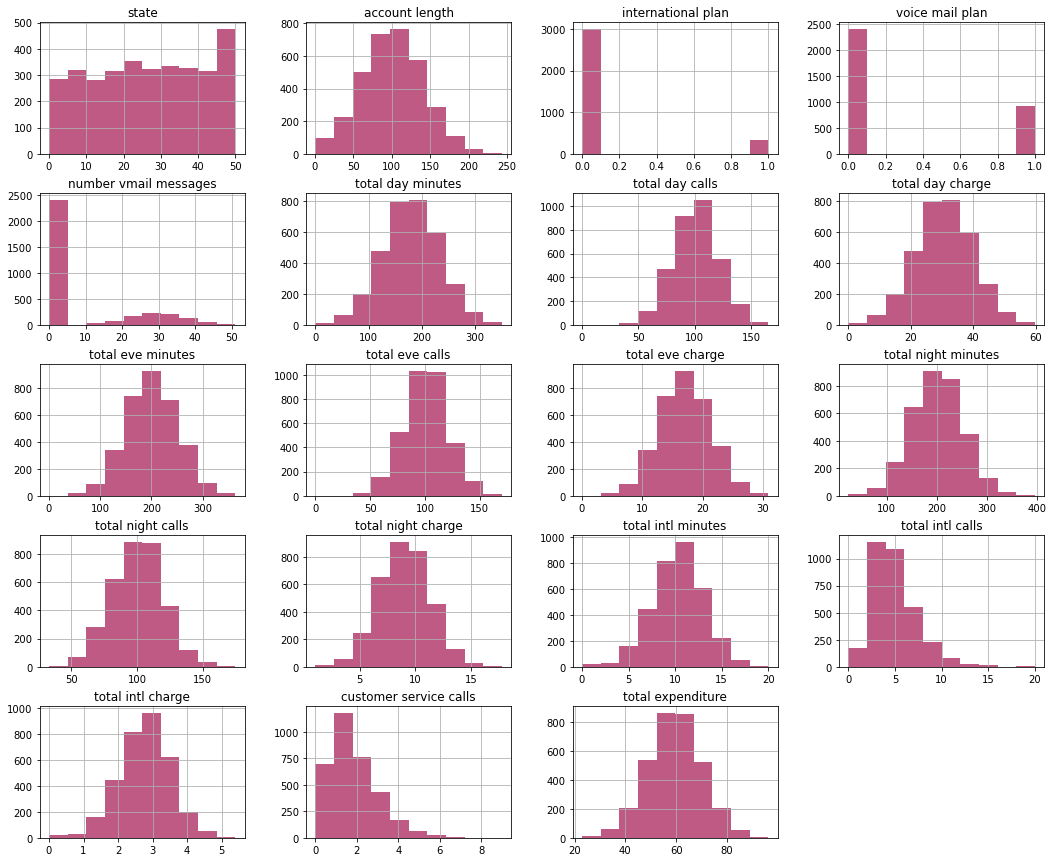

In [14]:
# The Distribution of Features

df.drop(columns='churn').hist(figsize=(18, 15), color="#BE5A83");


We notice based on this output that the features have different scalings, and we especially take note that not all of them are <b> normally distributed </b>

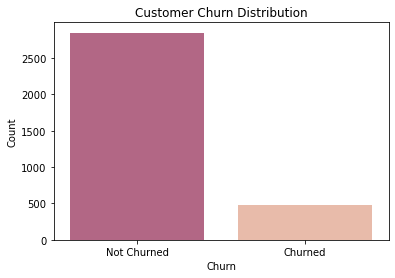

In [15]:
# Display the count of churned and non-churned counts in a bar chart 

churn_counts = df["churn"].value_counts()

# Plot the bar chart
sns.countplot(x="churn", data=df, palette=custom_colors)
plt.xlabel("Churn")
plt.ylabel("Count")
plt.title("Customer Churn Distribution")
plt.xticks([0,1], ["Not Churned", "Churned"])
plt.show()

In [16]:
# This function will be used to find the percentage value in different columns
def calculate_percentage(column):
    percentages = column.value_counts(normalize=True) * 100
    return percentages

In [17]:
churn_percentages = calculate_percentage(df["churn"])
print(churn_percentages)

0    85.508551
1    14.491449
Name: churn, dtype: float64


We can take note that majority of the customers 85.5% had not churned (2850), while 14.5 % had churned(483). 

In [18]:
# Count the number of churned and non-churned customers by international plan
churn_intl_plan = df.groupby(['churn', 'international plan']).size().unstack()
total_churn_itl = churn_intl_plan.sum(axis=1)  # Calculate the total count for each churn category
percentage_intl_plan = churn_intl_plan.div(total_churn_itl, axis=0) * 100  # Calculate the percentage
percentage_intl_plan

international plan,0,1
churn,,
0,93.473684,6.526316
1,71.635611,28.364389


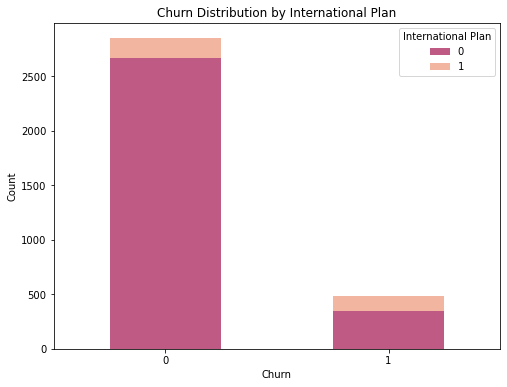

In [19]:
# Display as a bar chart

# Plots a stacked bar chart to visualize the relationship
churn_intl_plan.plot(kind='bar', stacked=True, figsize=(8, 6), color=custom_colors)

plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution by International Plan')
plt.xticks(rotation=0)
plt.legend(title='International Plan')

plt.show()

Observations:

- Among customers who did not churn (churn=False), approximately 93.50% have "no" international plan, and 6.50% have "yes" international plan.
- Among customers who churned (churn=True), approximately 71.64% have "no" international plan, and 28.36% have "yes" international plan.

In [20]:
# Count the number of churned and non-churned customers by voicemail plan
churn_voicemail = df.groupby(['churn', 'voice mail plan']).size().unstack()
total_churn_vm= churn_voicemail.sum(axis=1)  # Calculate the total count for each churn category
percentage_vm = churn_voicemail.div(total_churn_vm, axis=0) * 100  # Calculate the percentage
percentage_vm

voice mail plan,0,1
churn,,
0,70.456140,29.543860
1,83.436853,16.563147


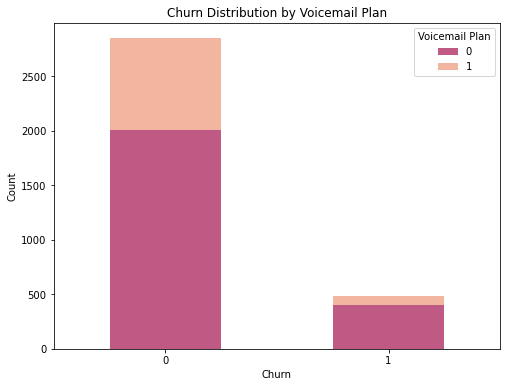

In [21]:
# Display as a bar chart

# Plot a stacked bar chart to visualize the relationship
churn_voicemail.plot(kind='bar', stacked=True, figsize=(8, 6), color=custom_colors)

plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution by Voicemail Plan')
plt.xticks(rotation=0)
plt.legend(title='Voicemail Plan')

plt.show()

#### <b> Observations: </b>

- Churned customers (True): 83.44% did not have a voice mail plan (no), while 16.56% had a voice mail plan (yes).

- Non-churned customers (False): 70.46% did not have a voice mail plan (no), and 29.54% had a voice mail plan (yes).

In [22]:
churn_area_code = df.groupby('area code')['churn'].value_counts().unstack() / 100
churn_area_code

churn,0,1
area code,,
408,7.16,1.22
415,14.19,2.36
510,7.15,1.25


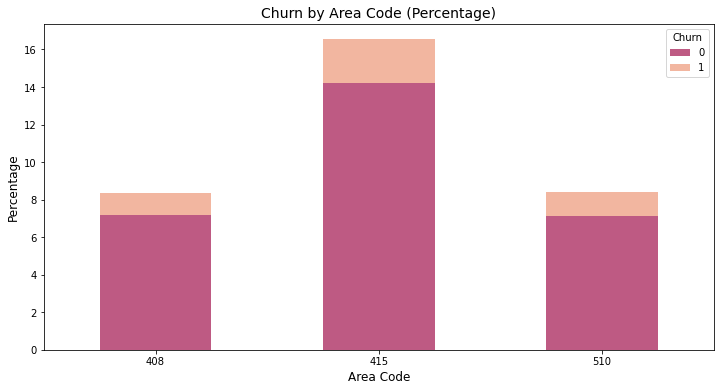

In [23]:
churn_area_code.plot(kind='bar', stacked=True, figsize=(12, 6), color=custom_colors)
plt.xlabel('Area Code', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Churn by Area Code (Percentage)', fontsize=14)
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=0)
plt.show()

Observations:


1. In area code <u>408</u>, there are 716 customers who did not churn, while 122 customers churned. The churn rate for this area code is relatively lower compared to the non-churn rate.

2. Area code <u>415</u> has a higher number of non-churned customers, with 1419 customers, compared to 236 customers who churned. 

3. In area code <u>510</u>, there are 715 non-churned customers, while 125 customers churned. 

### <b> Multivariate Analysis</b>

In [24]:
# Creates a Correlation Matrix & then displays it as a heatmap
corr_matrix = df.corr()
corr_matrix

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total expenditure
state,1.000000,0.003678,-0.004597,-0.031664,-0.027762,-0.006737,-0.000764,-0.006736,0.013682,-0.016268,0.013674,0.024576,0.007458,0.024572,-0.007834,0.013967,-0.007819,-0.025861,0.007780,0.004437
account length,0.003678,1.000000,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541,0.001454
international plan,-0.004597,0.024735,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852,0.048415
voice mail plan,-0.031664,0.002918,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148,0.008585
number vmail messages,-0.027762,-0.004628,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728,0.009766
total day minutes,-0.006737,0.006216,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151,0.884754
total day calls,-0.000764,0.038470,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459,0.003673
total day charge,-0.006736,0.006214,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151,0.884757
total eve minutes,0.013682,-0.006757,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796,0.413143
total eve calls,-0.016268,0.019260,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233,0.009392


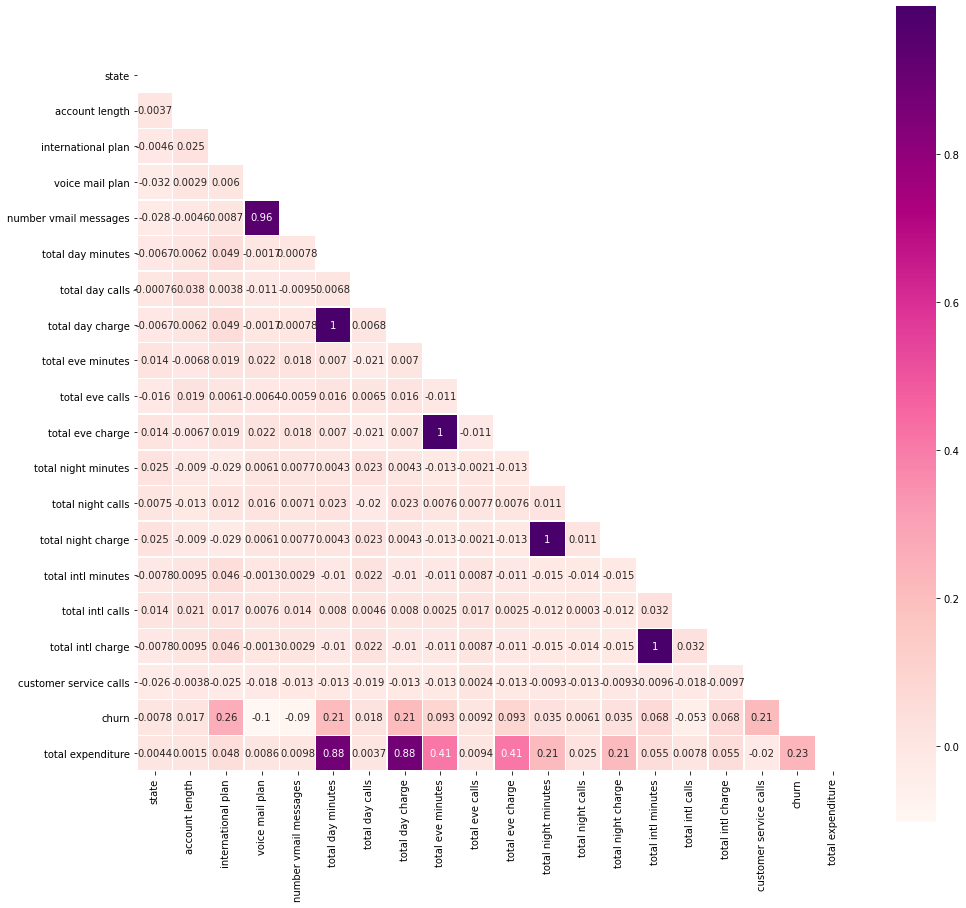

In [25]:
# Display as a heat map
#using a heatmap to show correlation
fig, ax = plt.subplots(figsize=(16,15))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), linewidths=0.5, mask=mask, square=True, ax=ax, annot=True, cmap="RdPu");

In [26]:
def check_multicollinearity(df, threshold=0.95):
    corr_matrix = df.select_dtypes(include=np.number).corr().abs()
    correlated_pairs = set()
    for col in corr_matrix:
        correlated_cols = corr_matrix.index[corr_matrix[col] > threshold]
        correlated_pairs.update([(min(col, correlated_col), max(col, correlated_col)) for correlated_col in correlated_cols if col != correlated_col])
    for pair in correlated_pairs:
        print(f"{pair[0]} --- {pair[1]}")
    return set(df.columns) & set(col for pair in correlated_pairs for col in pair)

# Call the function to check multicollinearity
multicollinear_features = check_multicollinearity(df)


total day charge --- total day minutes
total night charge --- total night minutes
total intl charge --- total intl minutes
total eve charge --- total eve minutes
number vmail messages --- voice mail plan


##### <b> <u> Observations: </u></b>

The following pairs of features exhibit high correlation above the threshold of 0.95:

<ul>
<li> <code>total day minutes</code> and <code>total day charge</code></li>
<li> <code>total eve minutes</code> and <code>total eve charge</code></li>
<li> <code>total night minutes</code> and <code>total night charge</code></li>
<li> <code>total intl minutes</code> and <code>total intl charge</code></li>
</ul>


We can therefore take note that: 

There is a strong positve correlation between : 

- total day minutes and total day charge. This suggests that as the number of minutes spent on day calls increases, the corresponding charge for those calls also increases.

- total eve minutes and total eve charge. This indicates that higher evening call durations are associated with higher charges for those calls.

- total intl minutes is highly correlated with total intl charge. This indicates that longer international call durations are associated with higher charges for those calls.


In order to deal with the multicollinearity in the features, one of the features from each pair will have to be dropped. 



In [27]:
# Drop some columns in order to deal with multicollinearity

df = df.drop(columns=['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes'])
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day calls',
       'total day charge', 'total eve calls', 'total eve charge',
       'total night calls', 'total night charge', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn',
       'total expenditure'],
      dtype='object')

#### <b> Data Preparation for ML Purposes 

#### Setting the target </b>

In [28]:
X= df.drop('churn', axis=1)
y = df.churn
X.head() #Inspect new df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,total expenditure
0,16,128,415,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,75.56
1,35,107,415,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,59.24
2,31,137,415,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,62.29
3,35,84,408,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,66.80
4,36,75,415,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,52.09


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)


In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 1066 to 1346
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2499 non-null   int64  
 1   account length          2499 non-null   int64  
 2   area code               2499 non-null   object 
 3   international plan      2499 non-null   int64  
 4   voice mail plan         2499 non-null   int64  
 5   number vmail messages   2499 non-null   int64  
 6   total day calls         2499 non-null   int64  
 7   total day charge        2499 non-null   float64
 8   total eve calls         2499 non-null   int64  
 9   total eve charge        2499 non-null   float64
 10  total night calls       2499 non-null   int64  
 11  total night charge      2499 non-null   float64
 12  total intl calls        2499 non-null   int64  
 13  total intl charge       2499 non-null   float64
 14  customer service calls  2499 non-null

In [31]:
X_train = X_train.drop('area code', axis=1).select_dtypes(include=['int', 'float'])
X_test = X_test.drop('area code', axis=1).select_dtypes(include=['int', 'float'])


In [32]:
X_train.info() # inspect the changes made in the cell above

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 1066 to 1346
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2499 non-null   int64  
 1   account length          2499 non-null   int64  
 2   international plan      2499 non-null   int64  
 3   voice mail plan         2499 non-null   int64  
 4   number vmail messages   2499 non-null   int64  
 5   total day calls         2499 non-null   int64  
 6   total day charge        2499 non-null   float64
 7   total eve calls         2499 non-null   int64  
 8   total eve charge        2499 non-null   float64
 9   total night calls       2499 non-null   int64  
 10  total night charge      2499 non-null   float64
 11  total intl calls        2499 non-null   int64  
 12  total intl charge       2499 non-null   float64
 13  customer service calls  2499 non-null   int64  
 14  total expenditure       2499 non-null

In [33]:
# Scale the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Create an instance of SMOTE
smote = SMOTE(random_state=123)

# Resample the training data using SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 

# Print the class distribution of the synthetic samples
class_distribution = pd.Series(y_train_resampled).value_counts()
print("Synthetic Sample Class Distribution:")
print(class_distribution)

Synthetic Sample Class Distribution:
1    2127
0    2127
Name: churn, dtype: int64


In [35]:
# SMOTE not applied to test data
y_test.value_counts()

0    723
1    111
Name: churn, dtype: int64

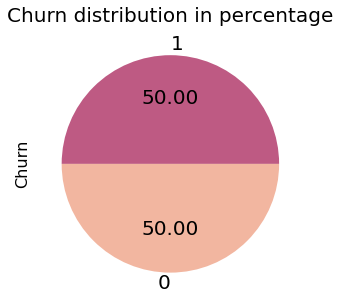

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))

y_train_resampled.value_counts().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 20}, colors=custom_colors, ax=ax)
ax.set_ylabel('Churn', fontsize=16)
ax.set_title('Churn distribution in percentage', fontsize=20);

The distribution of the churn classes is now balanced. SMOTE was applied on the training sets only.

This ensured that an accurate gauge can be made on the model's performance by using a raw test sample that has not been oversampled or undersampled.

# <b> Modeling

The models that are used in this analysis include: </b>

1. Logistic Regression

2. Decision Tree

3. Random Forest

4. K Nearest Neighbors


## <b>Logistic Regression Model </b>

In [37]:
# Pipeline
pipe_log = Pipeline(steps=[('scale', StandardScaler()), ('logreg', LogisticRegression(fit_intercept=False, solver='liblinear'))])
pipe_log.fit(X_train_resampled, y_train_resampled)


Pipeline(steps=[('scale', StandardScaler()),
                ('logreg',
                 LogisticRegression(fit_intercept=False, solver='liblinear'))])

In [74]:
def evaluate(model, X_test, y_test, cmap='RdPu'):
    y_train_preds = model.predict(X_train_resampled)
    y_test_preds = model.predict(X_test)
    
    print('Recall Score:')
    print('Train:', recall_score(y_train_resampled, y_train_preds))
    print('Test:', recall_score(y_test, y_test_preds))
    
    print('\nPrecision Score:')
    print('Train:', precision_score(y_train_resampled, y_train_preds))
    print('Test:', precision_score(y_test, y_test_preds))
    
    print('\nAccuracy Score:')
    print('Train:', accuracy_score(y_train_resampled, y_train_preds))
    print('Test:', accuracy_score(y_test, y_test_preds))

    print('\nF1 Score:')
    print('Train:', f1_score(y_train_resampled, y_train_preds))
    print('Test:', f1_score(y_test, y_test_preds))
    
    cm = confusion_matrix(y_test, y_test_preds, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    
    fig, ax = plt.subplots(figsize=(8, 8))
    disp.plot(ax=ax, cmap=cmap)
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    
    plt.show()

Recall Score:
Train: 0.7498824635637047
Test: 0.7387387387387387

Precision Score:
Train: 0.7038834951456311
Test: 0.26885245901639343

Accuracy Score:
Train: 0.7172073342736248
Test: 0.697841726618705

F1 Score:
Train: 0.7261552469838379
Test: 0.3942307692307692


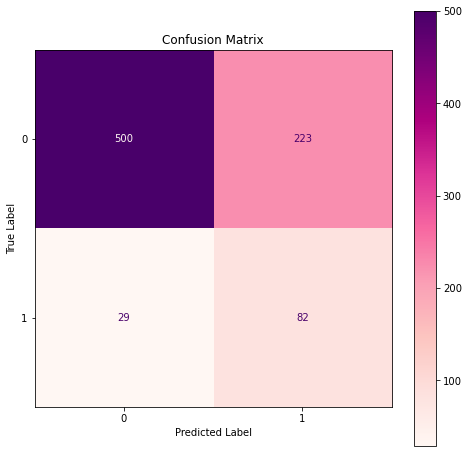

In [75]:
evaluate(pipe_log, X_test, y_test)


#### <b> Observations </b>

<b>1. Recall Score: </b>

The model achieves a recall of approximately 75% on the training data and 74% on the test data.

This means that the model is successful in correctly identifying around 74-75% of the actual positive cases in both sets.

The relatively consistent performance suggests that the model generalizes well.

<b>2. Precision Score:</b>

 The precision score indicates the proportion of correctly predicted positive cases out of all predicted positive cases.

The model achieves a precision of approximately 70% on the training data, but it drops significantly to around 27% on the test data.

This discrepancy suggests that the model may be prone to a large number of false positives when applied to unseen data.

<b>
3. Accuracy Score:</b>

The model attains an accuracy of approximately 72% on the training data and 70% on the test data.

While the accuracy is relatively high, it is important to note that accuracy alone may not provide a comprehensive assessment of model performance, especially in imbalanced datasets.


<b>4. F1 Score: </b>


The logistic regression model achieves an F1 score of 0.726 on the training set, indicating a balanced performance in terms of precision and recall. However, the F1 score drops to 0.394 on the test set, suggesting that the model may suffer from overfitting and struggles to generalize well to unseen data. 


Overall, the model's performance seems to indicate some potential issues with generalization, as evidenced by the lower precision and slightly lower accuracy on the test data. It is advisable to further investigate and potentially fine-tune the model to improve its performance on unseen data.






#  <b> Non Parametric Models </b>
---
## <b> Decision Tree Model </b>



In [40]:
# Create a pipeline
pipe_dt = Pipeline(steps=[('scale', StandardScaler()), ('clf', DecisionTreeClassifier(criterion='entropy', random_state=42))])
pipe_dt.fit(X_train_resampled, y_train_resampled)


Pipeline(steps=[('scale', StandardScaler()),
                ('clf',
                 DecisionTreeClassifier(criterion='entropy', random_state=42))])

Recall Score:
Train: 1.0
Test: 0.8648648648648649

Precision Score:
Train: 1.0
Test: 0.4549763033175355

Accuracy Score:
Train: 1.0
Test: 0.8441247002398081

F1 Score:
Train: 1.0
Test: 0.5962732919254659


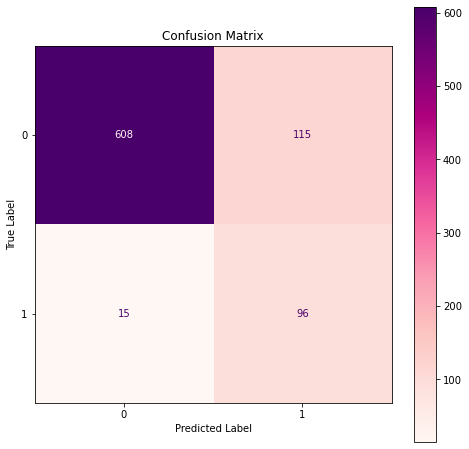

In [41]:
evaluate(pipe_dt, X_test, y_test)

In [42]:
def plot_feature_importances(pipe, figsize, custom_color):
    model = pipe.steps[1][1]
    plt.figure(figsize=figsize)
    bars = plt.barh(X_train_resampled.columns, model.feature_importances_, align='center')
    
    # Set custom color for the bars
    for bar in bars:
        bar.set_color(custom_color)
    
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.show()

custom_color = "#BE5A83"  # Custom color for the bars to match the theme


#### <b> Observations </b>

From the above visualisation, we observe the following are the most <u> key features </u> in determining whether a customer will churn or not. 

- Total Expenditure 

- Customer Service Calls

- Total intl charge

- Total night charge 

- Voicemail plan



In [44]:
## Feature Selection 

rfecv = RFECV(estimator=DecisionTreeClassifier(random_state=42), scoring='recall')
pipe_dt2 = Pipeline(steps=[('scale', StandardScaler()), ('Feature Selection', rfecv), ('clf', DecisionTreeClassifier(random_state=42))])
pipe_dt2.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scale', StandardScaler()),
                ('Feature Selection',
                 RFECV(estimator=DecisionTreeClassifier(random_state=42),
                       scoring='recall')),
                ('clf', DecisionTreeClassifier(random_state=42))])

In [45]:
print(f'The optimal number of features are {rfecv.n_features_}' )


The optimal number of features are 15


In [46]:
# Rank these features - with 1

rfecv_df = pd.DataFrame(rfecv.ranking_,index=X_train_resampled.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfecv_df[rfecv_df['Rank'] == 1]

,Rank
state,1
account length,1
international plan,1
voice mail plan,1
number vmail messages,1
total day calls,1
total day charge,1
total eve calls,1
total eve charge,1
total night calls,1


In [47]:
## We will drop the features that are not optimal in predicting churn rate

cols = rfecv_df[rfecv_df['Rank'] == 1].index
X_train_resampled = X_train_resampled[cols]
X_test = X_test[cols]
X_train_resampled.head(3) # Inspects the dataframe

,state,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,total expenditure
0,16,117,0,1,25,140,36.72,69,19.05,112,12.06,4,3.19,0,71.02
1,5,86,0,0,0,93,37.03,95,18.25,70,10.29,7,3.05,0,68.62
2,42,37,0,0,0,126,37.57,110,17.38,98,5.31,3,1.84,4,62.10


#### <b>HyperParameter Tuning for Decision Tree</b>

In [48]:
params_dt = {'clf__criterion': ['gini', 'entropy'],
             'clf__max_depth': range(14, 32, 2),
             'clf__min_samples_split' : range(2, 10, 2),
             'clf__min_samples_leaf': [2, 3, 5, 7, 10],
             'clf__max_features': [11, 13, 15]
}

gridsearch_dt = GridSearchCV(pipe_dt, params_dt, cv=4, scoring='recall')
gridsearch_dt.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('clf',
                                        DecisionTreeClassifier(criterion='entropy',
                                                               random_state=42))]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': range(14, 32, 2),
                         'clf__max_features': [11, 13, 15],
                         'clf__min_samples_leaf': [2, 3, 5, 7, 10],
                         'clf__min_samples_split': range(2, 10, 2)},
             scoring='recall')

In [49]:
# parameters that gave the best result
print(f'The optimal parameters in this model are: {gridsearch_dt.best_params_}')
print()
# Mean cross-validated score of the best_estimator
print(f'The validation recall: {gridsearch_dt.best_score_}')

The optimal parameters in this model are: {'clf__criterion': 'entropy', 'clf__max_depth': 24, 'clf__max_features': 15, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2}

The validation recall: 0.8622412316100987


Recall Score:
Train: 0.9764927127409497
Test: 0.8648648648648649

Precision Score:
Train: 0.9857617465590888
Test: 0.45933014354066987

Accuracy Score:
Train: 0.9811941701927598
Test: 0.8465227817745803

F1 Score:
Train: 0.9811053377420877
Test: 0.6000000000000001


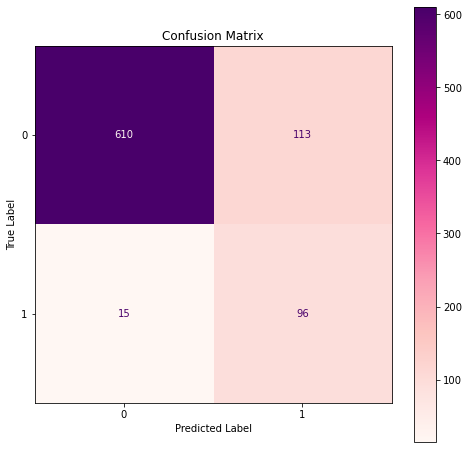

In [50]:
# Evaluate the model
evaluate(gridsearch_dt, X_test, y_test)


#### <b> Observations </b>


The decision tree model demonstrates improvements across multiple evaluation metrics compared to logistic regression.

<b> 1. Accuracy Score </b>:

The decision tree model achieves an accuracy score of 98.12% on the training set and 84.65% on the test set. This indicates a higher level of overall correctness in predicting churned and non-churned customers compared to logistic regression.

<b> 2. Recall Score </b>:

The decision tree model performs significantly better in terms of recall. It achieves a recall score of 97.65% on the training set and 86.49% on the test set. This indicates a higher ability to correctly identify churned customers, reducing the chances of false negatives compared to logistic regression.

<b> 3. Precision Score </b>:

While the decision tree model has a higher recall score, it shows a lower precision score. It achieves a precision score of 98.58% on the training set and 45.93% on the test set. This suggests that the decision tree model has a higher rate of false positives, leading to a lower precision in predicting churned customers compared to logistic regression.

<b> 4. F1 Score</b>: 

The F1 score for the decision tree model is 98.11% on the training set and 60.00% on the test set. The F1 score combines the precision and recall metrics, providing a balanced measure of the model's performance. The higher F1 score on the training set indicates a good balance between precision and recall, but the lower F1 score on the test set suggests a trade-off between the two metrics.


In summary, the decision tree model shows improvements in accuracy and recall compared to logistic regression. However, it also introduces challenges in maintaining a high precision score. The trade-off between precision and recall is reflected in the F1 score, which indicates a compromise between the two metrics.

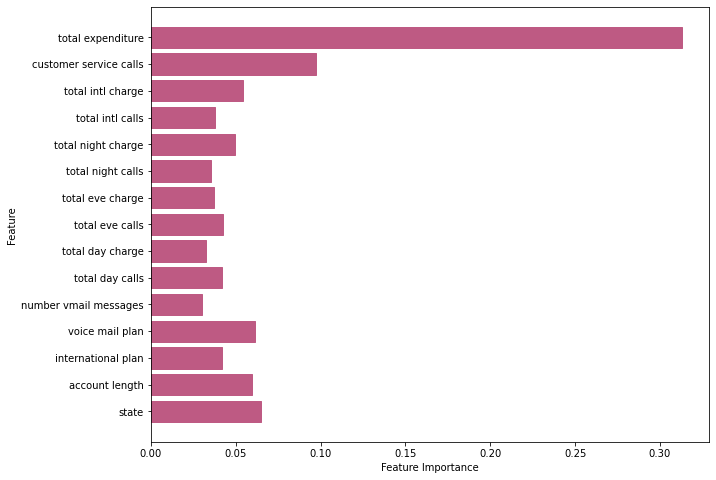

In [65]:
plot_feature_importances(pipe_dt, (10, 8), custom_color)

#### <b> Observations </b>

From the above visualisation, we observe the following are the most <u> key features </u> in determining whether a customer will churn or not. 

- Total Expenditure 

- Customer Service Calls

- Total intl charge

- Total night charge 

- Voicemail plan



## <b> Random Forest Model </b>

In [52]:
# # create a pipeline for Random Forest Model
pipe_rf = Pipeline(steps=[('scale', StandardScaler()), ('rf', RandomForestClassifier(random_state=42))])
pipe_rf.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scale', StandardScaler()),
                ('rf', RandomForestClassifier(random_state=42))])

Recall Score:
Train: 1.0
Test: 0.7477477477477478

Precision Score:
Train: 1.0
Test: 0.8645833333333334

Accuracy Score:
Train: 1.0
Test: 0.9508393285371702

F1 Score:
Train: 1.0
Test: 0.8019323671497585


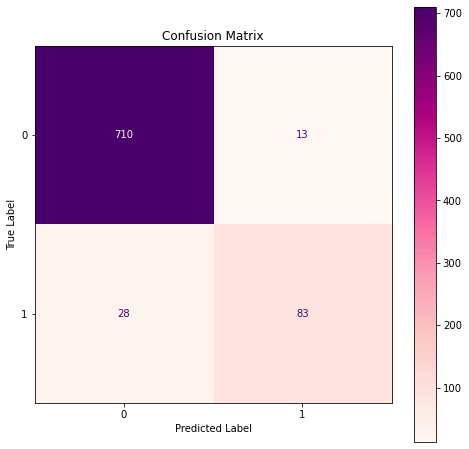

In [53]:
# evaluate model performance
evaluate(pipe_rf, X_test, y_test)

#### <b> Hyperparameter tuning on the Random Forest Model </b>

In [54]:
# hyperparameter tuning using GridSearchCV for Random Forest
params_rf = {'rf__n_estimators': range(400, 800, 200),
             'rf__criterion': ['gini', 'entropy'],
             'rf__max_depth': range(14, 20, 2),
             'rf__min_samples_split': range(3, 4, 7),
             'rf__min_samples_leaf': [5, 7, 12]
             
}

gridsearch_rf = GridSearchCV(pipe_rf, params_rf, cv=4, scoring='recall')
gridsearch_rf.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': range(14, 20, 2),
                         'rf__min_samples_leaf': [5, 7, 12],
                         'rf__min_samples_split': range(3, 4, 7),
                         'rf__n_estimators': range(400, 800, 200)},
             scoring='recall')

In [55]:
# parameters that gave the best result
print(f'The optimal parameters in this model are: {gridsearch_rf.best_params_}')
print()
# Mean cross-validated score of the best_estimator
print(f'The validation recall: {gridsearch_rf.best_score_}')

The optimal parameters in this model are: {'rf__criterion': 'entropy', 'rf__max_depth': 18, 'rf__min_samples_leaf': 5, 'rf__min_samples_split': 3, 'rf__n_estimators': 400}

The validation recall: 0.8288535604548094


Recall Score:
Train: 0.9567465914433474
Test: 0.7477477477477478

Precision Score:
Train: 0.9975490196078431
Test: 0.8383838383838383

Accuracy Score:
Train: 0.9771979313587212
Test: 0.947242206235012

F1 Score:
Train: 0.9767218622510199
Test: 0.7904761904761904


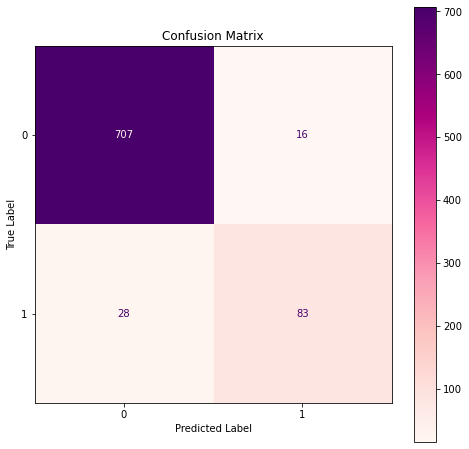

In [56]:
# evaluate the performance of the model
evaluate(gridsearch_rf, X_test, y_test)

#### <b> Observations </b>

The random forest model also exhibits improvements compared to logistic regression, with notable performance across different evaluation metrics.

<b> 1. Accuracy Score:</b>

The random forest model achieves an impressive accuracy score of 97.72% on the training set and 94.72% on the test set. This indicates a high level of overall correctness in predicting churned and non-churned customers, surpassing the accuracy of logistic regression.

<b> 2. Recall Score:</b>

The random forest model demonstrates a strong recall performance. It achieves a recall score of 95.67% on the training set and 74.77% on the test set. This suggests that the model is effective at correctly identifying churned customers, reducing the chances of false negatives, and outperforming logistic regression in terms of recall.

<b> 3. Precision Score:</b> 

The precision score of the random forest model is 99.75% on the training set and 83.84% on the test set. This indicates a relatively high rate of true positives in predicting churned customers. Although the precision score is lower than the recall score, it still outperforms logistic regression.

<b> 4. F1 Score: </b> 

The F1 score for the random forest model is 97.67% on the training set and 79.05% on the test set. This balanced metric combines precision and recall, reflecting the model's ability to balance between correctly identifying churned customers and minimizing false positives.

In summary, the random forest model shows improvements in accuracy, recall, and precision compared to logistic regression. It demonstrates a strong ability to correctly identify churned customers, resulting in a higher overall performance. The F1 score indicates a good balance between precision and recall, further highlighting the effectiveness of the random forest model.

### <b> Support Vector Machine </b>

In [57]:
# Create a pipeline for SVM
pipe_svm = Pipeline(steps=[('scale', StandardScaler()), ('svm', SVC(random_state=42))])

# Fit the pipeline on the resampled training data
pipe_svm.fit(X_train_resampled, y_train_resampled)


Pipeline(steps=[('scale', StandardScaler()), ('svm', SVC(random_state=42))])

Recall Score:
Train: 0.8975082275505407
Test: 0.6936936936936937

Precision Score:
Train: 0.9417858904785397
Test: 0.5238095238095238

Accuracy Score:
Train: 0.921015514809591
Test: 0.8752997601918465

F1 Score:
Train: 0.9191141068849301
Test: 0.5968992248062016


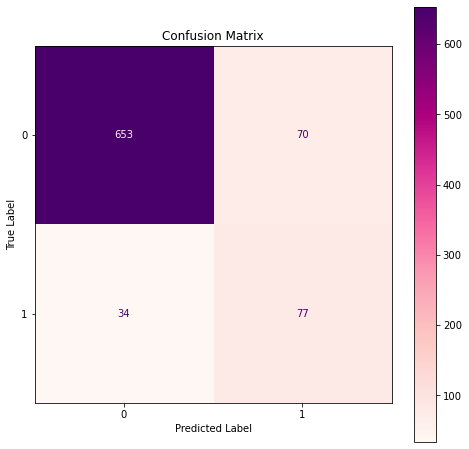

In [58]:
evaluate(pipe_svm, X_test, y_test)


In [59]:
params_svm = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto']
}

# Perform grid search
gridsearch_svm = GridSearchCV(pipe_svm, params_svm, cv=4, scoring='recall')
gridsearch_svm.fit(X_train_resampled, y_train_resampled)


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('svm', SVC(random_state=42))]),
             param_grid={'svm__C': [0.1, 1, 10],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['linear', 'rbf']},
             scoring='recall')

In [60]:

# Get the best parameters and best score
best_params = gridsearch_svm.best_params_
best_score = gridsearch_svm.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best Score: 0.9214800773119238


Recall Score:
Train: 0.9609779031499764
Test: 0.6576576576576577

Precision Score:
Train: 0.9756563245823389
Test: 0.5140845070422535

Accuracy Score:
Train: 0.9685002350728726
Test: 0.8717026378896883

F1 Score:
Train: 0.9682614874467076
Test: 0.5770750988142292


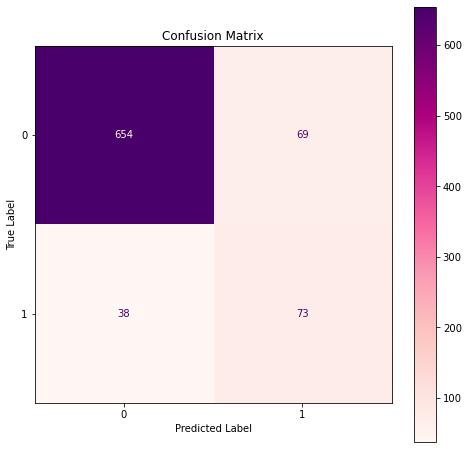

In [61]:
evaluate(gridsearch_svm, X_test, y_test)

#### <b> Observations </b>

<b> 1. Recall Score:</b> The SVM model achieves a relatively high recall score of 96.10% on the training set, indicating its ability to correctly identify positive cases (churned customers). However, the recall score drops to 65.77% on the test set, suggesting that the model may struggle to generalize well and accurately identify churn instances in new, unseen data.

<b> 2. Precision Score:</b> The precision score of the SVM model is 97.57% on the training set, indicating a high rate of true positives in predicting churned customers. On the test set, the precision score decreases to 51.41%, indicating a higher rate of false positives. This implies that the model may have a tendency to incorrectly classify non-churned customers as churned.

<b> 3. Accuracy Score:</b> The SVM model achieves an accuracy score of 96.85% on the training set, indicating a high level of overall correctness in predicting churned and non-churned customers. On the test set, the accuracy score is slightly lower at 87.17%, suggesting that the model's performance may decrease when applied to new data.

<b> 4. F1 Score:</b> The F1 score combines precision and recall, providing a balanced assessment of the model's performance. The SVM model achieves an F1 score of 96.83% on the training set, reflecting a good balance between correctly identifying churned customers and minimizing false positives. However, the F1 score drops to 57.71% on the test set, indicating a decrease in the model's ability to balance precision and recall when applied to new data.

---
# <b> Model Evaluation </b>


Based on the <u> Recall Scores </u> which was the main evaluation metrics in this classification model,
the best model to predict whether a customer would churn or not
is the <b><u>Decision Tree Model. </u></b>

This is due to the fact that it showed the best performance compared to all the other models that were utilised in this model.

<ul> <li> The recall score for the model was : 86.4 % </ul> </li>

<ul> <li> The optimal parameters in this model are: {'clf__criterion': 'entropy', 'clf__max_depth': 24, 'clf__max_features': 15, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2} </ul> </li>

In [62]:
# evaluation metrics of the best model based on the test data
print('DECISION TREE(TUNED) SCORES:')
print('Test Recall score: ', recall_score(y_test, gridsearch_dt.predict(X_test)))
print('Test Precision score: ', precision_score(y_test, gridsearch_dt.predict(X_test)))
print('Test Accuracy score: ', accuracy_score(y_test, gridsearch_dt.predict(X_test)))
print('F1 Score: ' , f1_score(y_test, gridsearch_dt.predict(X_test)))

DECISION TREE(TUNED) SCORES:
Test Recall score:  0.8648648648648649
Test Precision score:  0.45933014354066987
Test Accuracy score:  0.8465227817745803
F1 Score:  0.6000000000000001


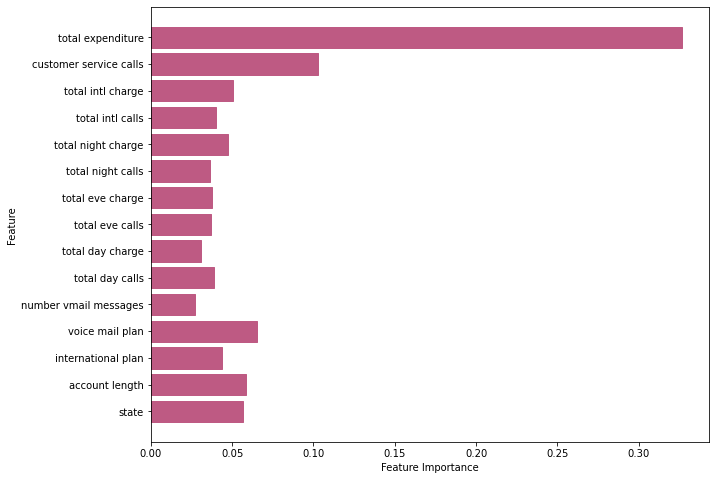

In [63]:
plot_feature_importances(gridsearch_dt.best_estimator_, (10, 8), custom_color)

----
# <b> Conclusion & Recommendations </b>

Based on the model results, as the Data Scientist assigned to this project, I would recommend the following.

1. As <b> total expenditure </b> is an influencing factor for whether or not a customer will churn; 

    It is important that SyriaTel reconsiders some of the costs, perhaps in a way that would be more accomodating to individuals that 
have a certain budget. 

2. Additionally, focus should be placed on the issues that are raised during the <b> customer service calls </b>, while also ensuring that those who are responding to the customers needs are adequately trained as well as adhering to good customer service norms, in order to ensure quality service is provided. 

3. Furthermore, SyriaTel should consider taking a customer-centered approach, for example having certain plans that can be modified to suit the needs of the diverse customer base, example: some customers may be more interested in the international plan compared to having a voice mail plan.